In [4]:
import numpy as np
import pandas as pd

In [9]:
raw_wv = pd.read_pickle('WORD2VEC_ALL.df')

In [10]:
raw_wv.head()

,w2v_d,w2v_q,w2v_t
id,,,
1,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0376018844545, 0.0500394329429, -0.03152773...","[-0.00186114124954, 0.0233284708112, -0.018777..."
2,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0107074677944, 0.0139652146026, -0.05871850...","[-0.00186114124954, 0.0233284708112, -0.018777..."
3,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0127446381375, 0.0762946121395, -0.02950597...","[-0.00186114124954, 0.0233284708112, -0.018777..."
4,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[-0.0200245970239, 0.0660118572414, -0.0250410...","[-0.00186114124954, 0.0233284708112, -0.018777..."
5,"[-0.0134135176334, 0.0255342997106, -0.0015336...","[0.0436171131829, 0.0350617634443, -0.00935281...","[-0.00186114124954, 0.0233284708112, -0.018777..."


In [ ]:
a = raw_wv['w2v_q'].apply(lambda x: pd.Series(x))
a.columns = ['w2vq_' + str(x) for x in a.columns]

b = raw_wv['w2v_t'].apply(lambda x: pd.Series(x))
b.columns = ['w2vt_' + str(x) for x in b.columns]

c = raw_wv['w2v_d'].apply(lambda x: pd.Series(x))
c.columns = ['w2vd_' + str(x) for x in c.columns]

combined = a.join(b).join(c)

In [ ]:
.columns = ['w2vd_%03d' % x for x in a.columns]

In [ ]:
combined.to_pickle('WORD2VEC.df')

In [ ]:
raw_wv.head()

In [ ]:
def f(r):
    return pd.Series([np.dot(r['w2v_q'], r['w2v_t']), np.dot(r['w2v_q'], r['w2v_d'])])

dots = raw_wv.apply(f, axis=1)
dots.columns = ['dots_qt', 'dotsqd']

In [ ]:
dots.head()

In [ ]:
loc = '%s'
#loc = '/home/ec2-user/data/hd/features/%s'

idx_train = pd.read_pickle(loc % 'LABELS_TRAIN.df')
idx_test = pd.read_pickle(loc % 'LABELS_TEST.df')

TRAIN = idx_train.join(dots)
TEST = idx_test.join(dots)

TRAIN.to_pickle('W2V_dots_train')
TEST.to_pickle('W2W_dots_test')

In [ ]:
loc = '%s'
#loc = '/home/ec2-user/data/hd/features/%s'

idx_train = pd.read_pickle(loc % 'LABELS_TRAIN.df')
idx_test = pd.read_pickle(loc % 'LABELS_TEST.df')

TRAIN = idx_train.join(combined).drop('relevance', axis=1).values
TEST = idx_test.join(combined).drop('relevance', axis=1).values

np.savez('W2V_vecs_train', TRAIN)
np.savez('W2W_vecs_test', TEST)
#TRAIN.to_pickle('W2V_vecs_train')
#TEST.to_pickle('W2W_vecs_test')

In [7]:
([3,4])

5.0

In [11]:
def f(r):
    return pd.Series([np.linalg.norm(r['w2v_q'] - r['w2v_t']), np.linalg.norm(r['w2v_q'] - r['w2v_d'])])

dists = raw_wv.apply(f, axis=1)
dists.columns = ['dists_qt', 'dists_qd']

In [12]:
dists.head()

,dists_qt,dists_qd
id,,
1,1.022913,0.978872
2,0.674364,0.705499
3,0.789099,0.737283
4,0.698987,0.593055
5,0.643414,0.611968


In [13]:
loc = '%s'
#loc = '/home/ec2-user/data/hd/features/%s'

idx_train = pd.read_pickle(loc % 'LABELS_TRAIN.df')
idx_test = pd.read_pickle(loc % 'LABELS_TEST.df')

TRAIN = idx_train.join(dists)
TEST = idx_test.join(dists)

np.savez('W2V_dists_train', TRAIN.drop('relevance', axis=1).values)
np.savez('W2V_dists_test', TEST.drop('relevance', axis=1).values)

In [14]:
TRAIN

,relevance,dists_qt,dists_qd
id,,,
2,3.00,0.674364,0.705499
3,2.50,0.789099,0.737283
9,3.00,0.600032,0.647243
16,2.33,0.640591,0.617270
17,2.67,0.472173,0.543989
18,3.00,0.812223,0.931188
20,2.67,0.490126,0.561267
21,3.00,0.857421,0.910541
23,2.67,0.513417,0.627410


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113394ed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1134307d0>], dtype=object)

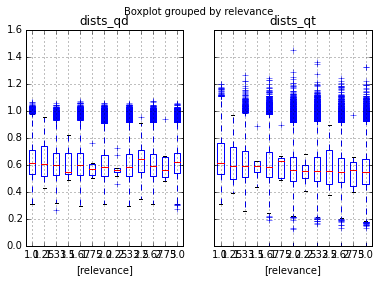

In [16]:
TRAIN.boxplot(by='relevance')

In [ ]:
TRAIN.head().drop('relevance', axis=1).head()

In [ ]:
TRAIN.head().drop('relevance', axis=1).values

In [ ]:
queries = pd.read_pickle('FEATURES_WITH_TEXT_1.data')

queries

In [15]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
queries[queries.product_description.isnull()]